In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from scipy.cluster import hierarchy as sch
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
data = pd.read_csv("C:/Users/dell/Documents/DS_Assignments/7_Clustering/crime_data.csv")

In [3]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data.shape

(50, 5)

In [5]:
data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


<AxesSubplot:xlabel='Assault', ylabel='Rape'>

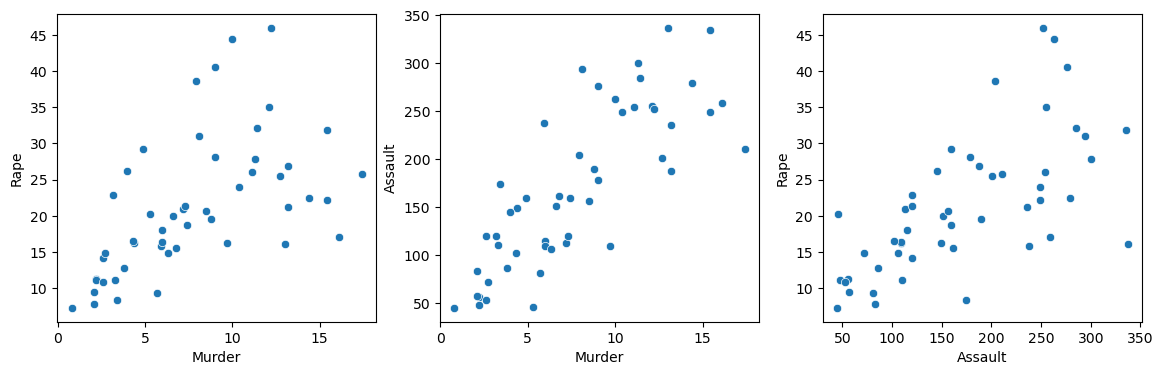

In [13]:
#data visualisation
#scatterplot
fig,axs=plt.subplots(1,3,figsize=(14,4))
sns.scatterplot("Murder","Rape",data=data,ax=axs[0])
sns.scatterplot("Murder","Assault",data=data,ax=axs[1])
sns.scatterplot("Assault","Rape",data=data,ax=axs[2])


<AxesSubplot:xlabel='Rape', ylabel='Count'>

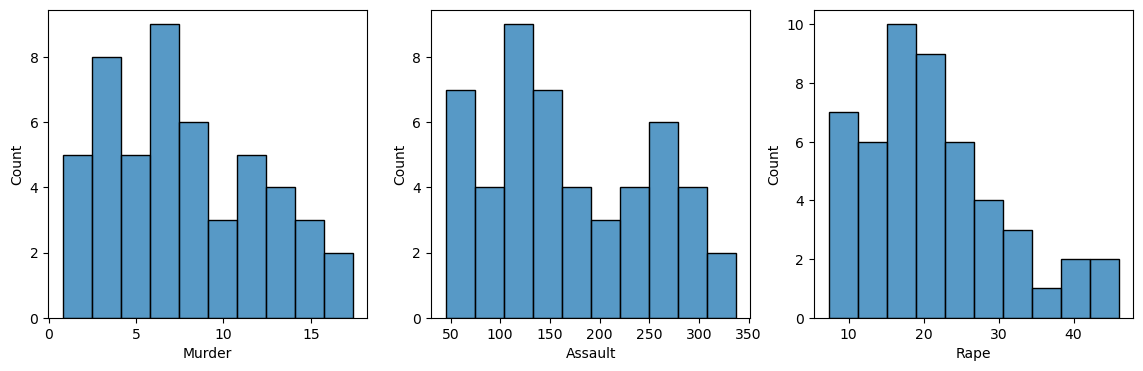

In [14]:
fig,axs=plt.subplots(1,3,figsize=(14,4))
sns.histplot(data["Murder"],bins=10,ax=axs[0])
sns.histplot(data["Assault"],bins=10,ax=axs[1])
sns.histplot(data["Rape"],bins=10,ax=axs[2])


In [16]:
data.rename(columns={'Unnamed: 0':'Country'},inplace=True)
data.head()

,Country,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [17]:
dataset=data.iloc[:,1:]
dataset.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [19]:
# Normalization function 
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
dataset_minmax = minmax_func(dataset.iloc[:,0:])

In [23]:
# Normalized data frame (considering the numerical part of data)
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
dataset_norm=std.fit_transform(dataset)


## Agglomerative Clustering


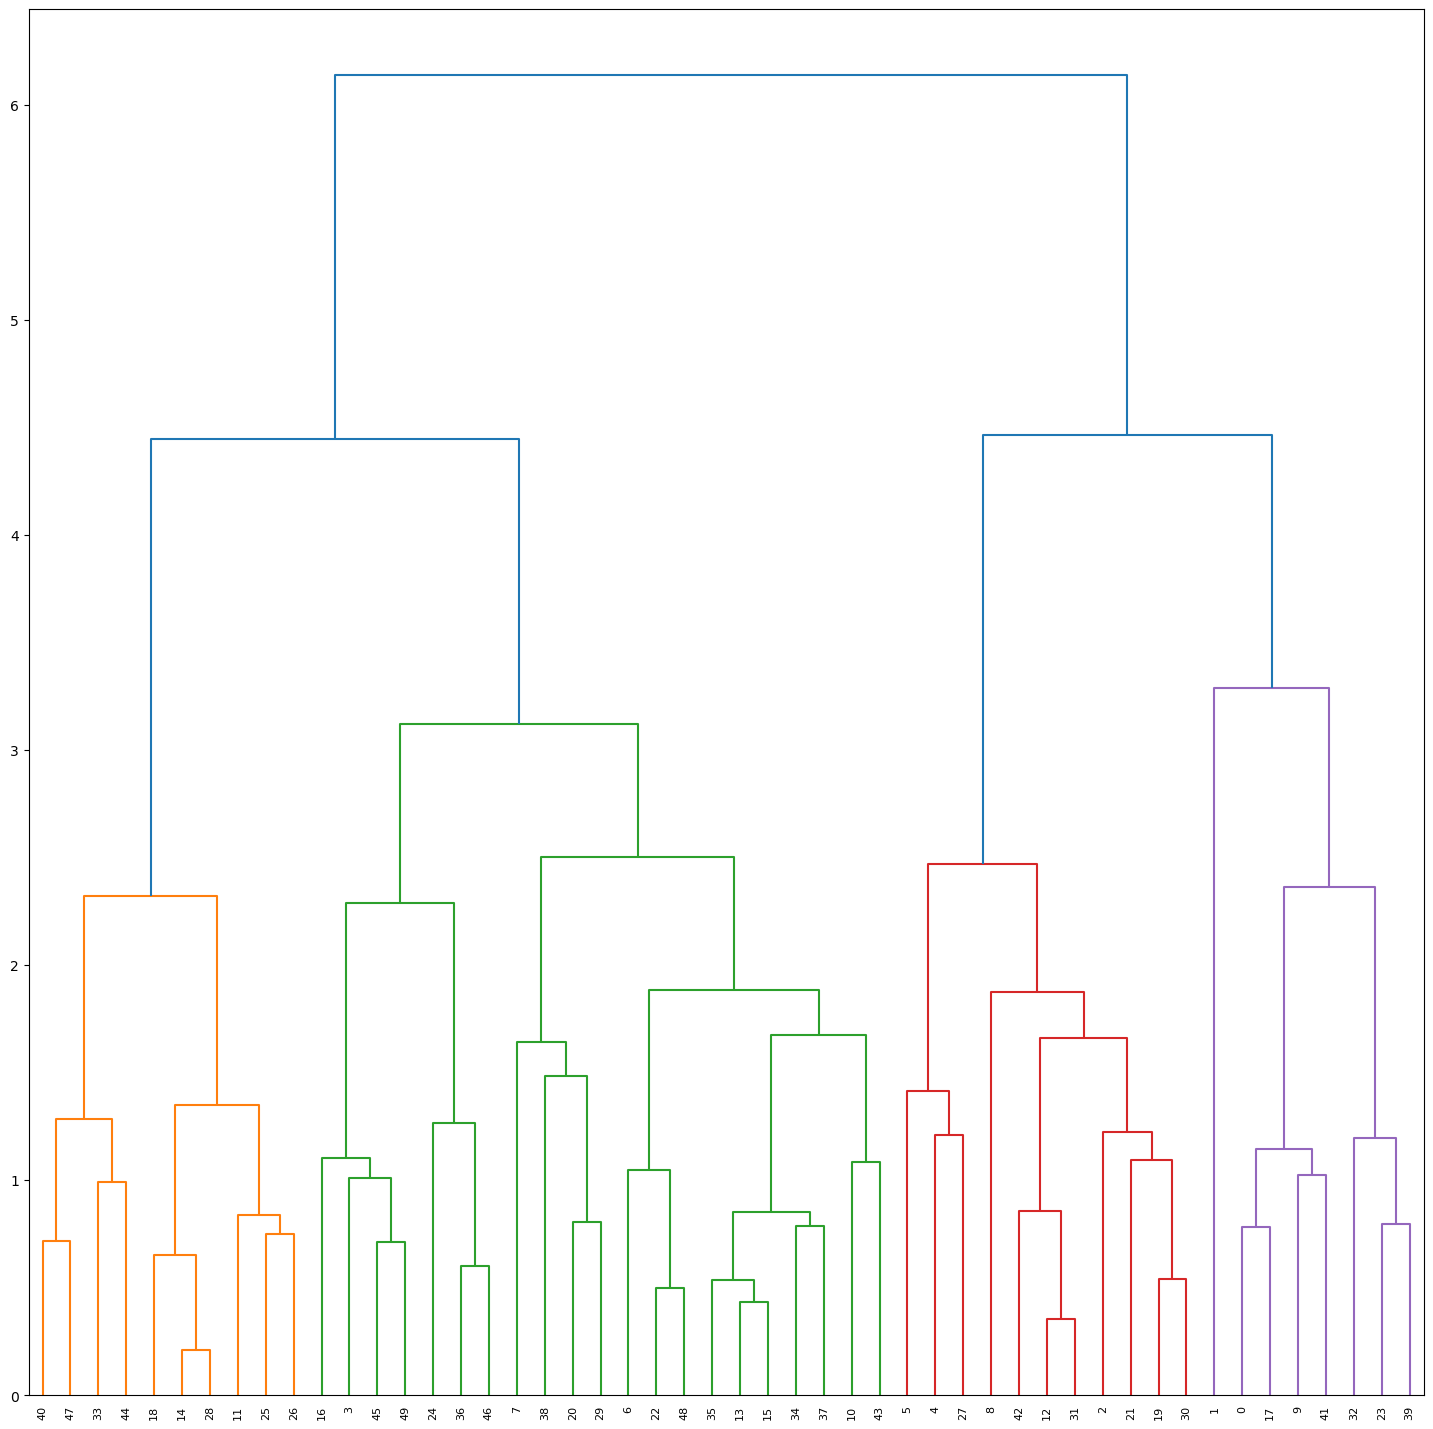

In [24]:
# create dendrogram
plt.figure(figsize=(18,18))
dendrogram = sch.dendrogram(sch.linkage(dataset_norm, method='complete'))

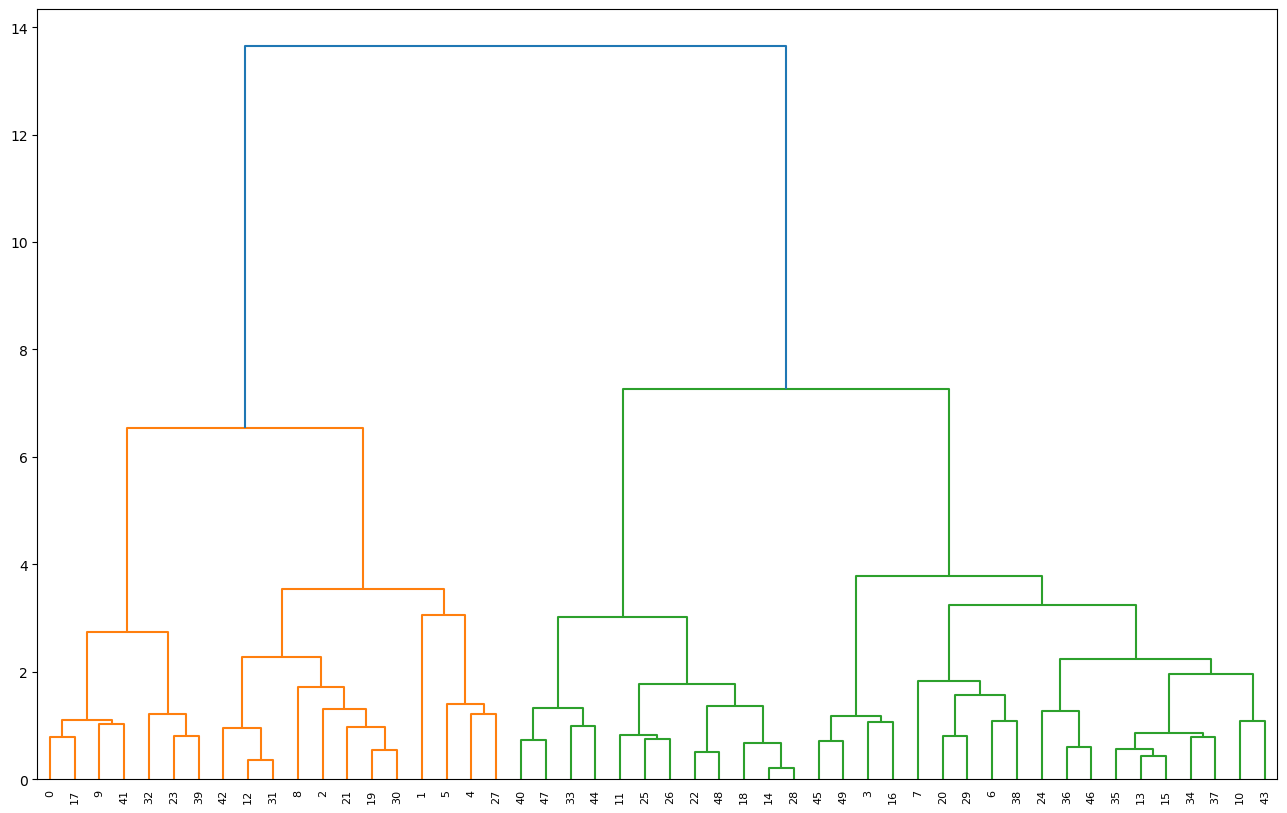

In [25]:
plt.figure(figsize=(16,10))
dngrm=sch.dendrogram(sch.linkage(dataset_norm, method='ward', metric='euclidean'))

In [26]:
agg=AgglomerativeClustering(n_clusters=2,linkage='single')
agg_data=agg.fit_predict(dataset_norm)
agg_data

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
agg_df=pd.DataFrame(agg_data)
agg_df.head()

,0
0,0
1,1
2,0
3,0
4,0


In [29]:
dataset['Clusters']=agg_df
dataset.head()

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0


In [30]:
agg_df.value_counts()

0    49
1     1
dtype: int64

In [31]:
agg_0=dataset[dataset.Clusters==0]
agg_0.head()

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0


In [32]:
dataset.groupby('Clusters').mean()

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,7.742857,168.877551,65.897959,20.757143
1,10.000000,263.000000,48.000000,44.500000


In [33]:
agg_1=dataset[dataset.Clusters==1]
agg_1

,Murder,Assault,UrbanPop,Rape,Clusters
1,10.0,263,48,44.5,1


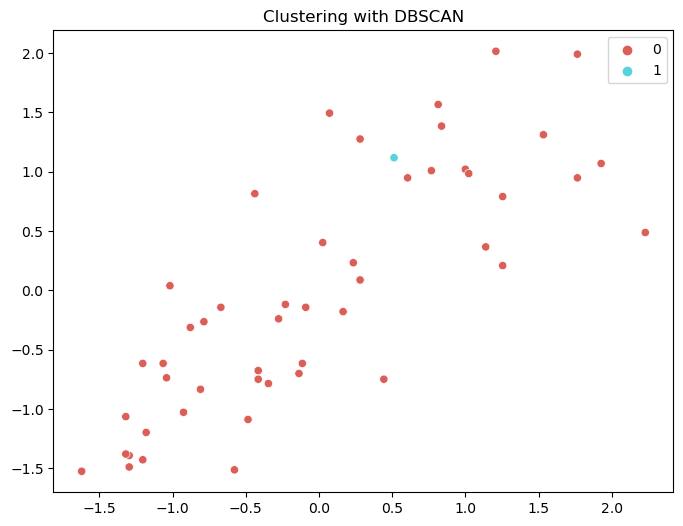

In [86]:
# Visualize the new clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataset_norm[:,0], y=dataset_norm[:,1], hue=agg_data, palette=sns.color_palette("hls", len(np.unique(agg_data))))
plt.title("Clustering with DBSCAN")
plt.show()

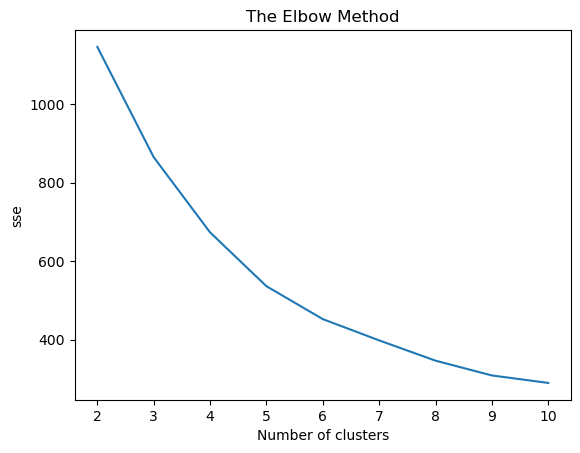

In [66]:
sse = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dataset_norm)
    sse.append(kmeans.inertia_)
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.show()

In [67]:
sse

[1146.459517093534,
 865.2628279924616,
 673.4712187348886,
 536.2034790432668,
 452.2284305074122,
 397.9445893438377,
 346.2280906369085,
 308.51695820798733,
 289.44933384198134]

In [42]:
#here the optimal kvalue is considered to be 4
KM_C=KMeans(n_clusters=4)
KM_DATA=KM_C.fit_predict(dataset_norm)
KM_DATA

array([3, 0, 0, 3, 0, 0, 2, 2, 0, 3, 2, 1, 0, 2, 1, 2, 1, 3, 1, 0, 2, 0,
       1, 3, 0, 1, 2, 0, 1, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 0, 2,
       1, 2, 2, 1, 1, 2])

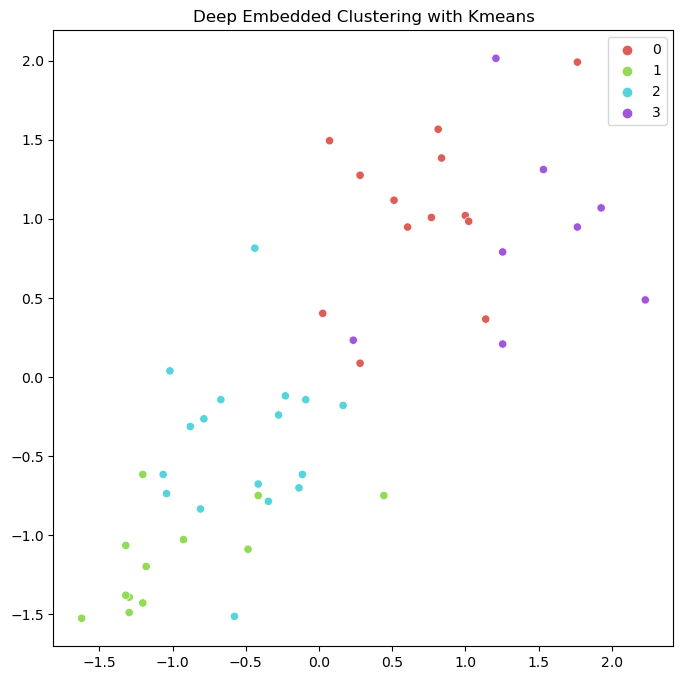

In [43]:
# Visualize the new clusters
plt.figure(figsize=(8, 8))
sns.scatterplot(x=dataset_norm[:,0], y=dataset_norm[:,1], hue=KM_DATA, palette=sns.color_palette("hls", len(np.unique(KM_DATA))))
plt.title("Clustering with Kmeans")
plt.show()

In [81]:
#DBSCAN
DB_C=DBSCAN(eps=0.7,min_samples=3)
DB_P=DB_C.fit_predict(dataset_norm)
DB_P


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1,
       -1,  0,  1, -1,  1,  0, -1, -1, -1,  0, -1,  0, -1,  1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1],
      dtype=int64)

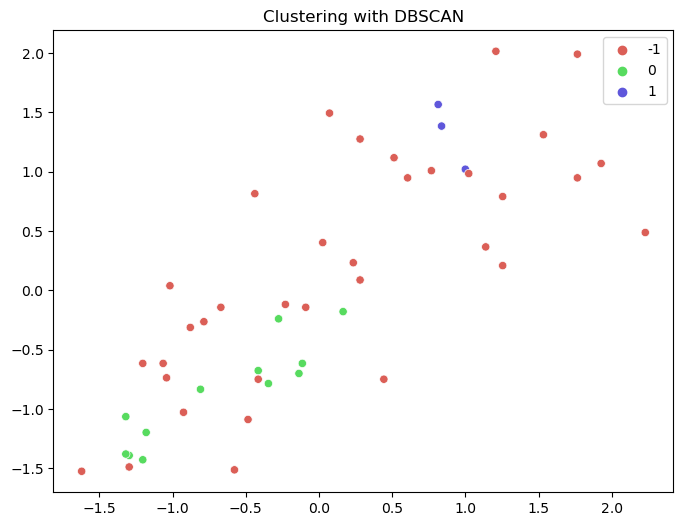

In [82]:
# Visualize the new clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataset_norm[:,0], y=dataset_norm[:,1], hue=DB_P, palette=sns.color_palette("hls", len(np.unique(DB_P))))
plt.title("Clustering with DBSCAN")
plt.show()

## 3 is the optimal number of clusters